<a href="https://colab.research.google.com/github/jopal60/tp_info_centre/blob/main/Tp_info_centre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
import numpy as np 
import seaborn as sns

# Importation de nos premier Bibliotheque
## Importation de notre jeu de données à partir de notre espace local dans un dossier de chemin Mes Document/Mes Documents le fichier excel du nom de Jonathan_PALUKU_MATHE.xlsx




Step 1. Appuyer sur le bouton select. fichier

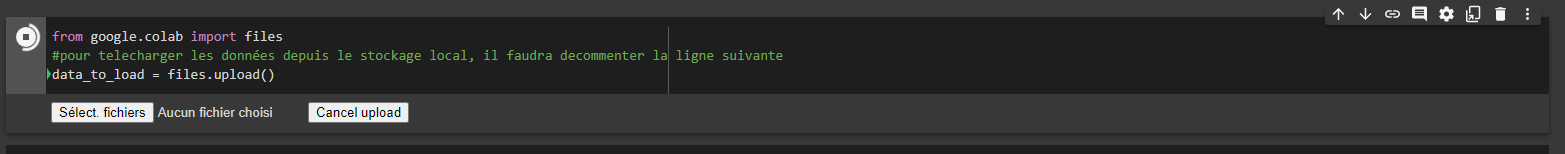

Step 2. choisir le fichier

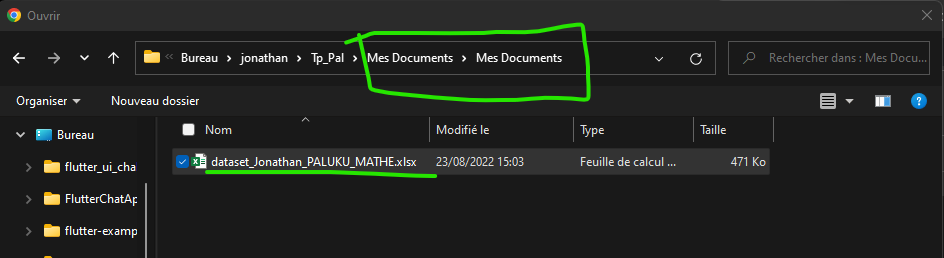

In [113]:
from google.colab import files
#pour telecharger les données depuis le stockage local, il faudra decommenter la ligne suivante
#data_to_load = files.upload()

# importation du fichier dans notre projet de machine learning 

In [115]:
import io
df = pd.read_excel(io.BytesIO(data_to_load['data_vin.xlsx']))

KeyError: ignored

In [117]:
df.shape  #taille de notre dataset

(6497, 14)

In [118]:
df.head()  # les entetes de notre dataset et les 5 premiers individus

,ID_individu,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,labels
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,3
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,3
2,2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,3
3,3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,3
4,4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,3


In [119]:
df.info() # information sur chaque colonne de notre dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_individu           6497 non-null   int64  
 1   fixed_acidity         6497 non-null   float64
 2   volatile_acidity      6497 non-null   float64
 3   citric_acid           6497 non-null   float64
 4   residual_sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free_sulfur_dioxide   6497 non-null   float64
 7   total_sulfur_dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
 13  labels                6497 non-null   int32  
dtypes: float64(11), int32(1), int64(2)
memory usage: 685.4 KB


# Verifiation des valeurs null pour un eventuel nettoyage de nos données

In [120]:
df.isnull().sum()

ID_individu             0
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
labels                  0
dtype: int64

# (2) Afficher les caractéristiques statistiques de cet ensemble de données

---






In [121]:
df.describe()

,ID_individu,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,labels
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,2042.535632,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,4.399415
std,1436.926393,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,2.952688
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,812.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,2.000000
50%,1649.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,4.000000
75%,3273.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,7.000000
max,4897.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,9.000000


# (3)À l’aide de l’algorithme 𝑘-means, segmentation de l'ensemble de données en 10 classes

In [122]:
X = df #notre dataset
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0) # choix du nombre de classes  
kmeans.fit(X) #entrainement du model

KMeans(n_clusters=10, random_state=0)

# Données non entrainées

<function matplotlib.pyplot.show(*args, **kw)>

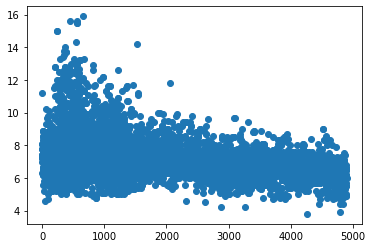

In [123]:
plt.scatter(X.values[:,0],X.values[:,1])
plt.show

In [124]:
centres=kmeans.cluster_centers_ #les centres  de chaques classes

In [125]:
df["labels"] = kmeans.labels_ #ajout d'une colonne pour trouver la classe de chaque elements

In [126]:
labels=kmeans.labels_

In [127]:
df.head(100) #affichage de 100 premier element et leur classe d'appartenance

,ID_individu,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,labels
0,0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,3
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,3
2,2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,3
3,3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,3
4,4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,7.1,0.260,0.29,12.4,0.044,62.0,240.0,0.9969,3.04,0.42,9.2,6,3
96,96,6.0,0.340,0.66,15.9,0.046,26.0,164.0,0.9979,3.14,0.50,8.8,6,3
97,97,8.6,0.265,0.36,1.2,0.034,15.0,80.0,0.9913,2.95,0.36,11.4,7,3
98,98,9.8,0.360,0.46,10.5,0.038,4.0,83.0,0.9956,2.89,0.30,10.1,4,3


In [128]:
len(np.unique(labels)) #veriification si nos avons reellement 10 classes

10

# (4)Déterminez la taille de chaque classe
## Comptage des éléments de chaque classes

In [129]:
from collections import Counter
print(Counter(labels).values())

dict_values([821, 827, 837, 833, 542, 541, 531, 528, 520, 517])


In [130]:
df.drop(['fixed_acidity','volatile_acidity',
                'citric_acid','residual_sugar','chlorides',
                'free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates',
                'alcohol','quality'],axis=1).groupby(['labels']).count()

,ID_individu
labels,
0,837
1,528
2,541
3,821
4,833
5,517
6,531
7,542
8,520


<function matplotlib.pyplot.show(*args, **kw)>

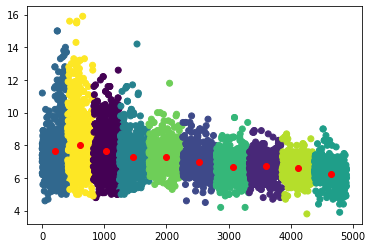

In [131]:
plt.scatter(X.values[:,0],X.values[:,1],c=labels)
plt.scatter(centres[:,0], centres[:,1],c='r')
plt.show

# utiliser l’analyse en composantes principales (ACP) pour la réduction de la dimensionnalité

In [132]:
from sklearn.decomposition import PCA
reduced_data = PCA(n_components=2).fit_transform(df) #reduction de dimension 2

In [133]:
reduced_columns=['PC'+str(c) for c in range(1, reduced_data.shape[1]+1,1)]
reduced_data=pd.DataFrame(reduced_data,index=df.index,columns=reduced_columns)
reduced_data.head()

,PC1,PC2
0,-2041.842378,77.674774
1,-2041.316146,32.886693
2,-2040.613787,2.656402
3,-2038.685996,93.169723
4,-2037.686049,93.159451


In [134]:
description_reduce=pd.Series(dict(zip(reduced_data.columns,100.0*pca.explained_variance_ratio_)))
description_reduce.head()

PC1    99.839165
PC2     0.152518
dtype: float64

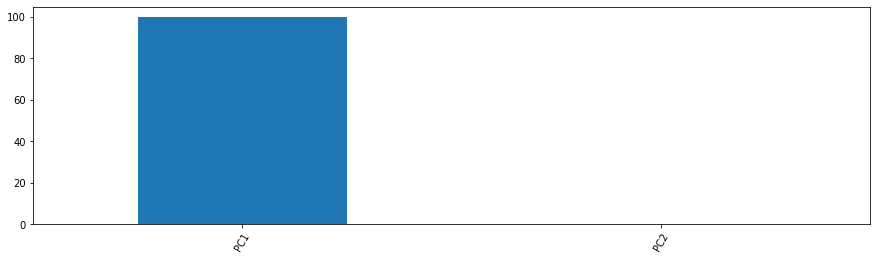

In [135]:
description_reduce.plot(kind='bar',figsize=(15,4),rot=60)

In [136]:
reduced_data #visualisation de la reduction de 10 dimention à deux

,PC1,PC2
0,-2041.842378,77.674774
1,-2041.316146,32.886693
2,-2040.613787,2.656402
3,-2038.685996,93.169723
4,-2037.686049,93.159451
...,...,...
6492,-449.217641,-64.992740
6493,-448.128390,-56.598333
6494,-447.265447,-69.579559
6495,-446.217751,-65.019978


In [137]:
data_df = pd.DataFrame(reduced_data)
data_df.head()

,PC1,PC2
0,-2041.842378,77.674774
1,-2041.316146,32.886693
2,-2040.613787,2.656402
3,-2038.685996,93.169723
4,-2037.686049,93.159451


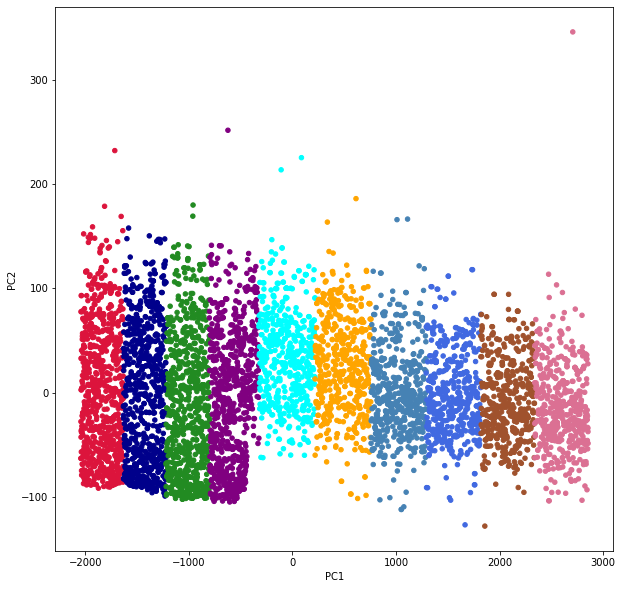

In [138]:
coleurs={0:'forestgreen',
             1:'royalblue',
             2:'orange',
             3:'crimson',
             4:'purple',
             5:'palevioletred',
             6:'steelblue',
             7:'cyan',
             8:'sienna',
             9:'darkblue'}
y_colors=[coleurs[i] for i in labels]
reduced_data.plot(x='PC1', y='PC2', kind='scatter',figsize=(10,10), color=y_colors)
plt.show()

In [139]:
data_df.describe()

,PC1,PC2
count,6.497000e+03,6497.000000
mean,3.583664e-14,0.000000
std,1.437002e+03,56.165229
min,-2.043292e+03,-128.169914
25%,-1.231270e+03,-42.243214
50%,-3.929972e+02,-2.639253
75%,1.230447e+03,40.109446
max,2.854112e+03,346.352315


In [140]:
df.drop(['fixed_acidity','volatile_acidity',
                'citric_acid','residual_sugar','chlorides',
                'free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates',
                'alcohol','quality'],axis=1).groupby(['labels']).describe()

ID_individu                                                             \
             count         mean         std     min      25%     50%      75%   
labels                                                                          
0            837.0  1032.756272  120.901598   823.0   928.00  1033.0  1137.00   
1            528.0  3596.500000  152.564740  3333.0  3464.75  3596.5  3728.25   
2            541.0  2531.000000  156.317519  2261.0  2396.00  2531.0  2666.00   
3            821.0   204.750305  118.573553     0.0   102.00   205.0   307.00   
4            833.0  1454.564226  127.519054  1240.0  1346.00  1450.0  1554.00   
5            517.0  4639.000000  149.389312  4381.0  4510.00  4639.0  4768.00   
6            531.0  3067.000000  153.430766  2802.0  2934.50  3067.0  3199.50   
7            542.0  1989.498155  156.609393  1718.0  1854.25  1989.5  2124.75   
8            520.0  4120.500000  150.255338  3861.0  3990.75  4120.5  4250.25   
9            827.0   616.752116  119.443778   410.0   513.50   617.0   720.00   

                
           max  
labels          
0       1245.0  
1       3860.0  
2       2801.0  
3        410.0  
4       1719.0  
5       4897.0  
6       3332.0  
7       2260.0  
8       4380.0  
9        825.0

# (7)Séparez l’ensemble de données résultant (de la segmentation) en données d’apprentissage et en données de test

In [141]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, df["labels"], test_size = 0.2, random_state=42, )

In [142]:
X_train.info

<bound method DataFrame.info of       ID_individu  fixed_acidity  volatile_acidity  citric_acid  \
1916         1916            6.6              0.25         0.36   
947           947            8.5              0.16         0.35   
877           877            6.0              0.28         0.34   
2927         2927            7.0              0.31         0.31   
6063         1165            8.5              0.44         0.50   
...           ...            ...               ...          ...   
3772         3772            6.3              0.24         0.29   
5191          293            6.9              0.36         0.25   
5226          328           13.4              0.27         0.62   
5390          492            8.9              0.40         0.51   
860           860            8.1              0.27         0.35   

      residual_sugar  chlorides  free_sulfur_dioxide  total_sulfur_dioxide  \
1916             8.1      0.045                 54.0                 180.0   
947    

In [143]:
X_test.info

<bound method DataFrame.info of       ID_individu  fixed_acidity  volatile_acidity  citric_acid  \
3103         3103            7.0              0.25         0.45   
1419         1419            7.6              0.14         0.74   
4761         4761            6.2              0.15         0.27   
4690         4690            6.7              0.16         0.32   
4032         4032            6.8              0.27         0.22   
...           ...            ...               ...          ...   
889           889            6.5              0.30         0.32   
2850         2850            6.7              0.24         0.29   
4917           19            7.9              0.32         0.51   
5198          300            7.5              0.53         0.06   
5643          745            7.3              0.51         0.18   

      residual_sugar  chlorides  free_sulfur_dioxide  total_sulfur_dioxide  \
3103             2.3      0.045                 40.0                 118.0   
1419   

# utilisez les méthodes suivantes pour construire vos modèles prédictifs :
## La régression logistique ;

In [144]:
from sklearn.linear_model import LogisticRegression
modele_logit = LogisticRegression(random_state=0, solver='liblinear', multi_class="auto")
modele_logit.fit(X_train,y_train)

LogisticRegression(random_state=0, solver='liblinear')

# Evaluation du modele logistique

In [145]:
modele_logit.score(X_test,y_test)

0.9238461538461539

In [146]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def machine_learn(model) :
    model_pipeline = Pipeline([('ss', StandardScaler()), 
                              ('model', model)])
    fitted_model = model_pipeline.fit(X_train, y_train)
    print("Accuracy Score:", fitted_model.score(X_test, y_test))
    model_preds = fitted_model.predict(X_test)
    print(classification_report(y_test, model_preds))
    print(confusion_matrix(y_test, model_preds))

In [147]:
X_train, X_test, y_train, y_test = train_test_split(df, df["labels"], test_size = 0.2, random_state=42, )

In [148]:
machine_learn(LogisticRegression(random_state=0, solver='liblinear', multi_class="auto"))

Accuracy Score: 0.9307692307692308
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       154
           1       1.00      1.00      1.00       104
           2       1.00      0.83      0.90       103
           3       1.00      1.00      1.00       191
           4       0.85      0.88      0.87       161
           5       1.00      1.00      1.00        90
           6       0.78      0.73      0.76       123
           7       0.66      0.81      0.73        99
           8       1.00      1.00      1.00       103
           9       1.00      1.00      1.00       172

    accuracy                           0.93      1300
   macro avg       0.93      0.92      0.93      1300
weighted avg       0.94      0.93      0.93      1300

[[154   0   0   0   0   0   0   0   0   0]
 [  0 104   0   0   0   0   0   0   0   0]
 [  0   0  85   0  14   0   4   0   0   0]
 [  0   0   0 191   0   0   0   0   0   0]
 [  0   0   0   0 141   0   8  12 

In [149]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
machine_learn(DecisionTreeClassifier(criterion='gini'))

Accuracy Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       154
           1       1.00      1.00      1.00       104
           2       1.00      1.00      1.00       103
           3       1.00      1.00      1.00       191
           4       1.00      1.00      1.00       161
           5       1.00      1.00      1.00        90
           6       1.00      1.00      1.00       123
           7       1.00      1.00      1.00        99
           8       1.00      1.00      1.00       103
           9       1.00      1.00      1.00       172

    accuracy                           1.00      1300
   macro avg       1.00      1.00      1.00      1300
weighted avg       1.00      1.00      1.00      1300

[[154   0   0   0   0   0   0   0   0   0]
 [  0 104   0   0   0   0   0   0   0   0]
 [  0   0 103   0   0   0   0   0   0   0]
 [  0   0   0 191   0   0   0   0   0   0]
 [  0   0   0   0 161   0   0   0   0   0]
 [  0 

In [150]:
from sklearn.neighbors import KNeighborsClassifier
machine_learn(KNeighborsClassifier(n_neighbors=100))

Accuracy Score: 0.8338461538461538
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       154
           1       0.79      0.74      0.77       104
           2       0.65      0.77      0.71       103
           3       0.87      0.87      0.87       191
           4       0.82      0.72      0.77       161
           5       0.89      0.94      0.92        90
           6       0.78      0.78      0.78       123
           7       0.70      0.86      0.77        99
           8       0.93      0.85      0.89       103
           9       0.97      0.91      0.94       172

    accuracy                           0.83      1300
   macro avg       0.83      0.83      0.83      1300
weighted avg       0.84      0.83      0.84      1300

[[135   0   7  10   2   0   0   0   0   0]
 [  0  77  25   0   2   0   0   0   0   0]
 [  2  20  79   0   2   0   0   0   0   0]
 [ 10   0   1 166  11   0   0   0   0   3]
 [  5   0   8  15 116   0   5  11 

In [151]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [152]:
model_rx = keras.Sequential()
model_rx.add(keras.layers.Dense(units = 1, activation = 'linear'))
model_rx.compile(loss='mse', optimizer="adam")

In [153]:
model_rx.fit( X_train,y_train, epochs=10, verbose=1)

Epoch 1/10
163/163 [==============================] - 1s 1ms/step - loss: 778194.6875
Epoch 2/10
163/163 [==============================] - 0s 1ms/step - loss: 286810.2812
Epoch 3/10
163/163 [==============================] - 0s 1ms/step - loss: 85370.4141
Epoch 4/10
163/163 [==============================] - 0s 1ms/step - loss: 20198.7461
Epoch 5/10
163/163 [==============================] - 0s 1ms/step - loss: 4623.8599
Epoch 6/10
163/163 [==============================] - 0s 1ms/step - loss: 1853.6331
Epoch 7/10
163/163 [==============================] - 0s 1ms/step - loss: 1431.0654
Epoch 8/10
163/163 [==============================] - 0s 1ms/step - loss: 1305.5043
Epoch 9/10
163/163 [==============================] - 0s 1ms/step - loss: 1204.1310
Epoch 10/10
163/163 [==============================] - 0s 1ms/step - loss: 1102.9276


In [156]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_rx = sc.fit_transform(X_train)
X_test_rx = sc.transform(X_test)

In [166]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

In [171]:
model = Sequential()
model.add(Dense(16, input_shape=(X_train_rx.shape[1],), activation='relu')) # input shape is (features,)
model.add(Dense(3, activation='softmax'))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))
model.summary()

# compile the model
model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 16)                240       
                                                                 
 dense_10 (Dense)            (None, 3)                 51        
                                                                 
 dense_11 (Dense)            (None, 10)                40        
                                                                 
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________


In [172]:
history = model.fit(x=X_train, y=y_train, validation_data=(X_test,y_test), batch_size=100, epochs=50)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


52/52 [==============================] - 1s 5ms/step - loss: 2.3225 - accuracy: 0.1316 - val_loss: 2.2922 - val_accuracy: 0.1215
Epoch 2/50
36/52 [===================>..........] - ETA: 0s - loss: 2.2443 - accuracy: 0.1228

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


52/52 [==============================] - 0s 2ms/step - loss: 2.2184 - accuracy: 0.1241 - val_loss: 2.1456 - val_accuracy: 0.1231
Epoch 3/50
52/52 [==============================] - 0s 2ms/step - loss: 2.1358 - accuracy: 0.1274 - val_loss: 2.1032 - val_accuracy: 0.2262
Epoch 4/50
52/52 [==============================] - 0s 2ms/step - loss: 2.1008 - accuracy: 0.2167 - val_loss: 2.0649 - val_accuracy: 0.2492
Epoch 5/50
52/52 [==============================] - 0s 2ms/step - loss: 2.0753 - accuracy: 0.2317 - val_loss: 2.0361 - val_accuracy: 0.2577
Epoch 6/50
52/52 [==============================] - 0s 2ms/step - loss: 2.0301 - accuracy: 0.2386 - val_loss: 1.9920 - val_accuracy: 0.2900
Epoch 7/50
52/52 [==============================] - 0s 2ms/step - loss: 1.9955 - accuracy: 0.2929 - val_loss: 1.9676 - val_accuracy: 0.3015
Epoch 8/50
52/52 [==============================] - 0s 2ms/step - loss: 1.9644 - accuracy: 0.2990 - val_loss: 1.9278 - val_accuracy: 0.2869
Epoch 9/50
52/52 [=============

In [173]:
model.evaluate(X_test,y_test)

30/41 [====================>.........] - ETA: 0s - loss: 1.2911 - accuracy: 0.3271

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


41/41 [==============================] - 0s 2ms/step - loss: 1.2851 - accuracy: 0.3292


[1.2850990295410156, 0.32923075556755066]

In [ ]:
def Evaluation_modele(model,features,labels):
    pred=model.predict(features)
    score=accuracy_score(Y_test,pred) # Nota: chaque modele a sa metrique
    print('Score  :', round(score,3))
    
models=[lr_cv.best_estimator_, 
        KNN_CV.best_estimator_,
        clf_tree_grid.best_estimator_]
for model in models:
    print('Model :'+str(model))
    Evaluation_modele(model,X_test, Y_test)
    
    print('-'*90)